In [19]:
import pandas as pd
import numpy as np


#DATA COLLECTION

In [100]:
df=pd.read_csv("/content/drive/MyDrive/placement task (3)/@INSTAGRAM_Dataset4.csv")
df.head(10)

,id,Name,Date,Time,Followers,Followings,Comments,Timespend(hrs),Likes,share
0,1,angel,01-01-2022,23:55,2,23.0,20,1,20.0,3.0
1,2,anya,02-01-2023,00:55,456,33.0,12,2,23.0,45.0
2,3,effie,03-01-2022,01:55,45,24.0,1,5,34.0,33.0
3,4,aurelia,07-05-2023,02:55,34,5.0,223,2,34.0,3.0
4,5,bexley,01-01-2023,03:55,56,566.0,444,1,3.0,4.0
5,6,kushal,01-02-2023,04:55,78,998.0,554,1,34.0,NaN
6,7,vishal,01-01-2023,05:55,56,66.0,7,2,34.0,0.0
7,8,rohit,02-02-2022,06:55,72,555.0,11,1,34.0,9.0
8,9,love,01-01-2023,07:55,6,224.0,54,2,44.0,6.0
9,10,loveleen,10-05-2023,08:55,276,45.0,556,2,65.0,5.0


In [21]:
df.shape

(40, 10)

In [22]:
df.columns

Index(['id', 'Name', 'Date', 'Time', 'Followers', 'Followings', 'Comments',
       'Timespend(hrs)', 'Likes', 'share'],
      dtype='object')

In [23]:
df.describe()

,id,Followers,Followings,Comments,Timespend(hrs),Likes,share
count,40.000000,40.000000,39.000000,40.000000,40.000000,39.000000,37.000000
mean,13.425000,205.900000,333.615385,108.100000,2.600000,80.153846,9.675676
std,6.942576,224.978495,296.335125,177.854709,1.316561,145.943489,14.757397
min,1.000000,2.000000,5.000000,1.000000,1.000000,3.000000,0.000000
25%,8.000000,32.750000,44.500000,9.000000,1.750000,34.000000,3.000000
50%,13.500000,59.000000,234.000000,20.500000,2.000000,45.000000,5.000000
75%,19.000000,367.000000,566.000000,64.250000,4.000000,56.000000,8.000000
max,26.000000,784.000000,998.000000,556.000000,5.000000,756.000000,66.000000


#DATA CLEANING PROCESS

In [24]:
df.isna().sum()

id                0
Name              0
Date              0
Time              0
Followers         0
Followings        1
Comments          0
Timespend(hrs)    0
Likes             1
share             3
dtype: int64

In [25]:
df.isna().sum().sum()

5

In [26]:
df.dropna(inplace = True)

In [27]:
df.isna().sum().sum()

0

#FEATURE ENGINEERING

In [28]:
df.head()

,id,Name,Date,Time,Followers,Followings,Comments,Timespend(hrs),Likes,share
0,1,angel,01-01-2022,23:55,2,23.0,20,1,20.0,3.0
1,2,anya,02-01-2023,00:55,456,33.0,12,2,23.0,45.0
2,3,effie,03-01-2022,01:55,45,24.0,1,5,34.0,33.0
3,4,aurelia,07-05-2023,02:55,34,5.0,223,2,34.0,3.0
4,5,bexley,01-01-2023,03:55,56,566.0,444,1,3.0,4.0


#FEATURE SELECTION

In [30]:
df1 = df.drop("Followings", axis='columns')
df1.head()

,id,Name,Date,Time,Followers,Comments,Timespend(hrs),Likes,share
0,1,angel,01-01-2022,23:55,2,20,1,20.0,3.0
1,2,anya,02-01-2023,00:55,456,12,2,23.0,45.0
2,3,effie,03-01-2022,01:55,45,1,5,34.0,33.0
3,4,aurelia,07-05-2023,02:55,34,223,2,34.0,3.0
4,5,bexley,01-01-2023,03:55,56,444,1,3.0,4.0


In [31]:
df1.shape

(36, 9)

#VIUALIZATION PROCESS

#1Q.Calculate the total nummber of action performed by each user.

In [35]:
S=df1.groupby('Name')[["Likes","share","Comments"]].sum()
S

,Likes,share,Comments
Name,,,
akash,101.0,10.0,54
angel,20.0,3.0,20
anya,66.0,48.0,24
aurelia,34.0,3.0,223
ava,512.0,8.0,440
bexley,48.0,6.0,456
dutt,110.0,50.0,17
effie,34.0,33.0,1
harf,813.0,73.0,344


In [36]:
S["Total_Action"]=S['Likes']+S['share']+S['Comments']

In [37]:
S


,Likes,share,Comments,Total_Action
Name,,,,
akash,101.0,10.0,54,165.0
angel,20.0,3.0,20,43.0
anya,66.0,48.0,24,138.0
aurelia,34.0,3.0,223,260.0
ava,512.0,8.0,440,960.0
bexley,48.0,6.0,456,510.0
dutt,110.0,50.0,17,177.0
effie,34.0,33.0,1,68.0
harf,813.0,73.0,344,1230.0


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'TOTAL ACTION PERFORMED BY USERS')

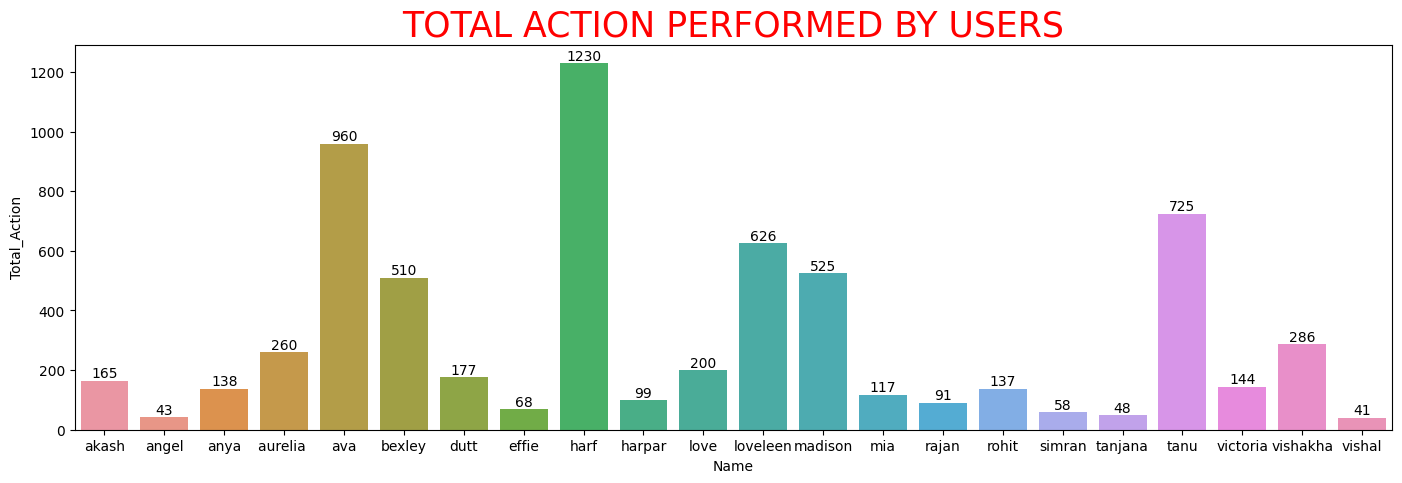

In [59]:
plt.figure(figsize=(17,5))
G1=sns.barplot(data =S, x=S.index,y='Total_Action')
for i in G1.containers:
  G1.bar_label(i)
plt.title("TOTAL ACTION PERFORMED BY USERS",fontsize=25, color="red")


Text(0.5, 1.0, 'TOTAL ACTION PERFORMED BY USERS')

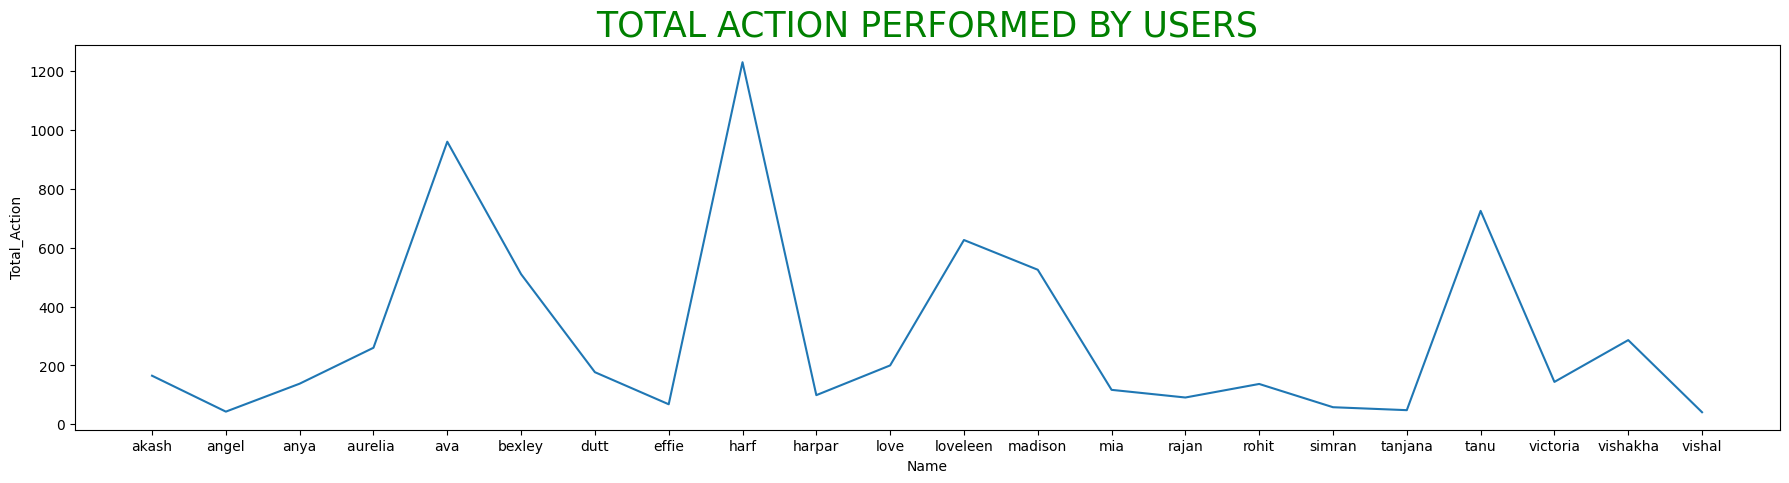

In [42]:
plt.figure(figsize=(22,5))
G1=sns.lineplot(data =S, x='Name',y='Total_Action')
plt.title("TOTAL ACTION PERFORMED BY USERS",fontsize=25, color="green")


Text(0.5, 1.0, 'TOTAL ACTIONS PERFORMED BY USER')

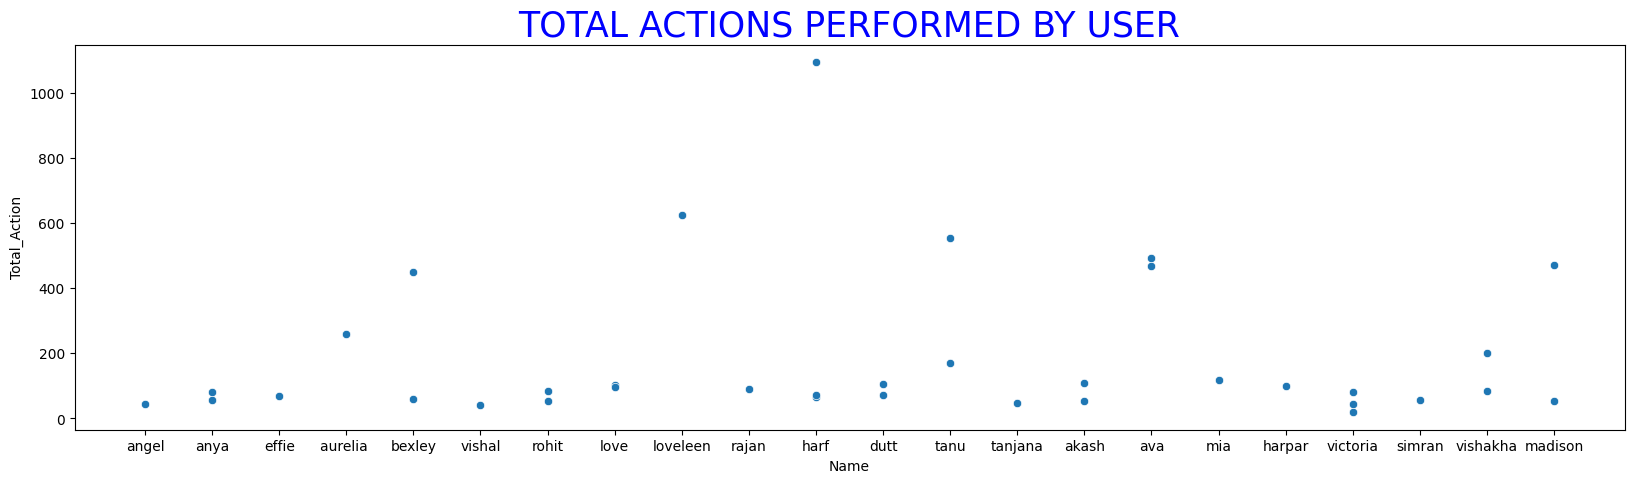

In [43]:
plt.figure(figsize=(20,5))
G1=sns.scatterplot(data =df1, x='Name',y='Total_Action')
plt.title("TOTAL ACTIONS PERFORMED BY USER",fontsize=25, color="blue")

#2Q.Determine the most common action performed by the users.

In [44]:
S.head()

,Likes,share,Comments,Total_Action
Name,,,,
akash,101.0,10.0,54,165.0
angel,20.0,3.0,20,43.0
anya,66.0,48.0,24,138.0
aurelia,34.0,3.0,223,260.0
ava,512.0,8.0,440,960.0


In [45]:
p=S['Likes'].mean()
p

135.45454545454547

In [77]:
q=S['Comments'].mean()
q

150.45454545454547

In [78]:
r=S['share'].mean()
r

16.272727272727273

By analysing the above {means} Likes has high quantity than coments and share activities.

In [79]:
G=["Likes","Comments","share"]

In [80]:
G3=[135,150,16]

([<matplotlib.patches.Wedge at 0x7e8db8bf3eb0>,
 [Text(-1.1843312628159837, 0.1932859537490956, 'Likes'),
  Text(1.041083761300016, -0.3551684135130992, 'Comments'),
  Text(0.19946377953248487, 1.1833064694552364, 'share')],
 [Text(-0.6908599033093237, 0.11275013968697244, '44.9%'),
  Text(0.5678638698000086, -0.19372822555259953, '49.8%'),
  Text(0.11635387139394951, 0.6902621071822213, '5.3%')])

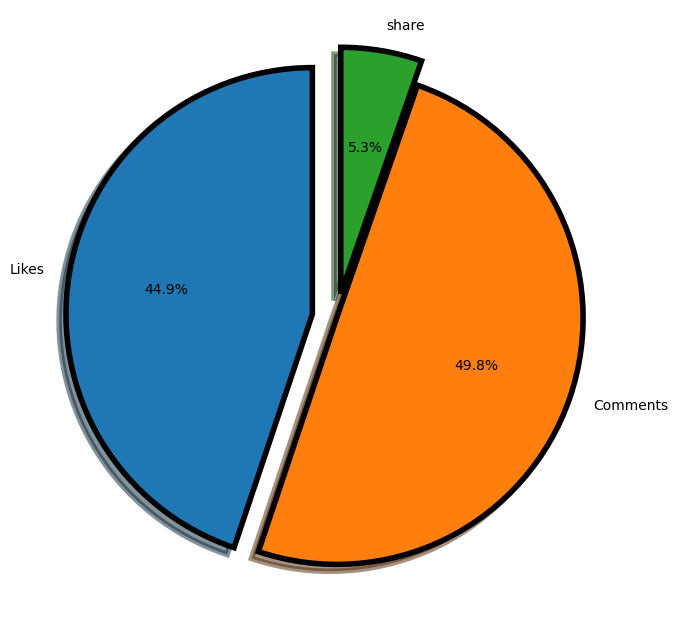

In [101]:
plt.figure(figsize=(8,8))
explode = (0.1, 0, 0.1)
G3=[135,150,16]
plt.pie( explode = explode,
        labels =G,x=G3, autopct = '%1.1f%%',
        shadow = True, startangle = 90,
        wedgeprops= {"edgecolor":"black",
                     'linewidth': 4,
                     'antialiased': True})


#Q3.Identify the user who has the highest engagement(sum of all action).

In [82]:
S.head()

,Likes,share,Comments,Total_Action
Name,,,,
akash,101.0,10.0,54,165.0
angel,20.0,3.0,20,43.0
anya,66.0,48.0,24,138.0
aurelia,34.0,3.0,223,260.0
ava,512.0,8.0,440,960.0


In [83]:
S.sort_values(["Total_Action"],ascending=False).head(1)

,Likes,share,Comments,Total_Action
Name,,,,
harf,813.0,73.0,344,1230.0


Text(0.5, 1.0, 'HIGHEST ENGAGEMENT OF USER')

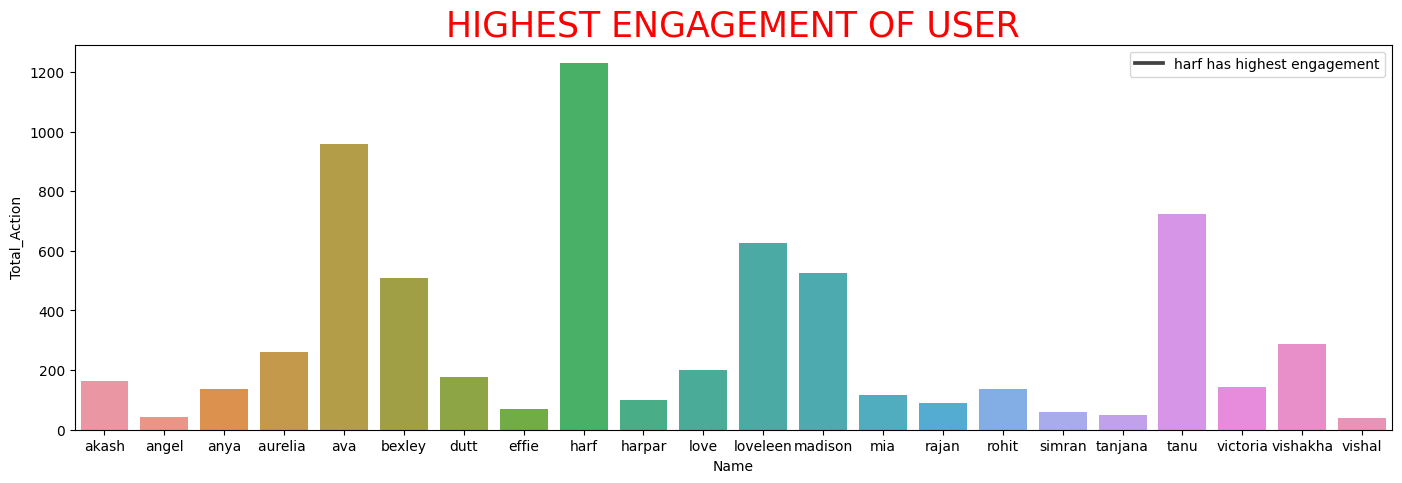

In [87]:
plt.figure(figsize=(17,5))
sns.barplot(data=S,x=S.index,y='Total_Action')
plt.legend(['harf has highest engagement'])
plt.title("HIGHEST ENGAGEMENT OF USER",fontsize=25, color="red")

#Q4.Provide the statistics on user activity over time(hourly,daily or monthly trends).

In [72]:
df['month']=pd.DatetimeIndex(df['Date']).month

<ipython-input-72-45a851171918>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['month']=pd.DatetimeIndex(df['Date']).month


In [73]:
df['year']=pd.DatetimeIndex(df['Date']).year

<ipython-input-73-ce39c74908f5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['year']=pd.DatetimeIndex(df['Date']).year


In [74]:
df['day']=pd.DatetimeIndex(df['Date']).day

<ipython-input-74-b78975487f7a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['day']=pd.DatetimeIndex(df['Date']).day


In [75]:
df.head()

,id,Name,Date,Time,Followers,Followings,Comments,Timespend(hrs),Likes,share,month,year,day
0,1,angel,01-01-2022,23:55,2,23.0,20,1,20.0,3.0,1,2022,1
1,2,anya,02-01-2023,00:55,456,33.0,12,2,23.0,45.0,2,2023,1
2,3,effie,03-01-2022,01:55,45,24.0,1,5,34.0,33.0,3,2022,1
3,4,aurelia,07-05-2023,02:55,34,5.0,223,2,34.0,3.0,7,2023,5
4,5,bexley,01-01-2023,03:55,56,566.0,444,1,3.0,4.0,1,2023,1


In [95]:
z=df.groupby(['year','month','Name'])['Timespend(hrs)'].sum()
z

year  month  Name    
2022  1      angel       1
      2      rohit       1
      3      effie       5
      7      akash       3
             rohit       3
             tanu        4
             victoria    4
             vishakha    2
      9      tanjana     5
      12     rajan       4
2023  1      bexley      1
             love        2
             vishal      2
      2      anya        2
             bexley      1
      3      anya        1
             harf        4
      7      akash       3
             aurelia     2
             ava         2
             dutt        5
             harf        7
             love        4
             madison     3
             mia         1
             simran      3
             tanu        5
             victoria    5
             vishakha    2
      8      ava         3
             harpar      1
      10     loveleen    2
      11     madison     4
Name: Timespend(hrs), dtype: int64

In [96]:
z.shape


(33,)

<Axes: ylabel='Timespend(hrs)'>

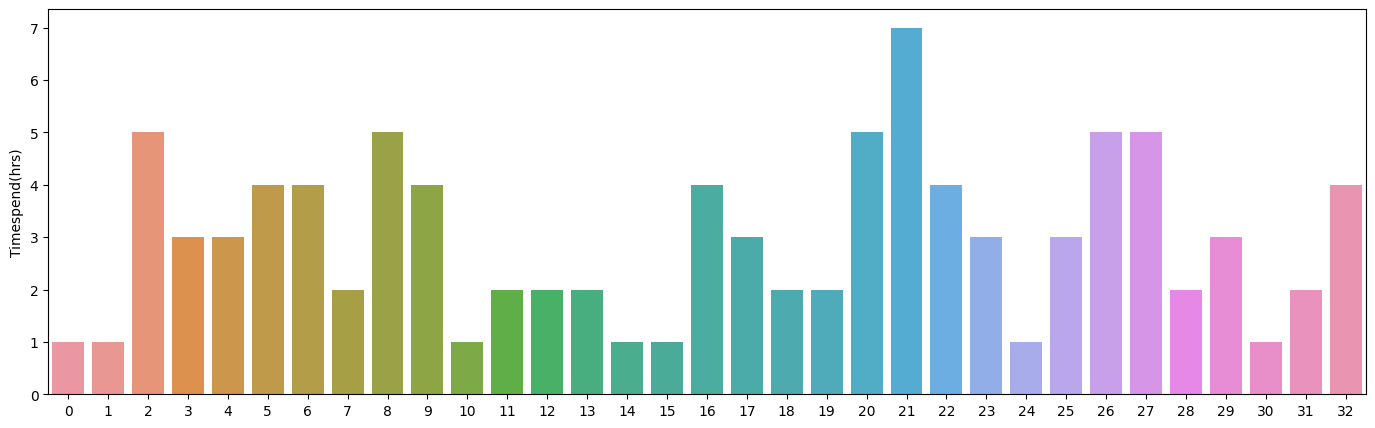

In [97]:
plt.figure(figsize=(17,5))
sns.barplot(x=[ i for i in range(0,33)],y=z)
